# Wrangling Assignment

In [171]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

All the needed libraries are added in the cell above.

## DATA

In [172]:
df = pd.read_csv("supermarket_sales_dirty.csv",encoding = 'unicode_escape')
#df.head() can also be used
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761904762,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,4.761904762,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761904762,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.048,1/27/2019,20:33,Ewallet,465.76,4.761904762,23.288,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,NaN,Ewallet,604.17,4.761904762,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,NaN,40.35,4.761904762,2.0175,6.2
996,NaN,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.49,3/2/2019,17:16,NaN,973.80,4.761904762,48.69,4.4
997,NaN,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.432,2/9/2019,13:22,NaN,31.84,4.761904762,1.592,7.7
998,NaN,A,Yangon,Normal,Male,Home and lifestyle,NaN,1,3.2910,69.111,2/22/2019,15:33,NaN,65.82,4.761904762,3.291,4.1


The data in the csv file is read using python library to read csv files. It's then displayed to just get a rough idea of data and columns it contains.

In [173]:
##displays the numbers of rows and columns a data contains.
df.shape

(1000, 17)

Data have 17 cols and 1000 entries.

## Data Types or Information of Data

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               905 non-null    object 
 1   Branch                   981 non-null    object 
 2   City                     996 non-null    object 
 3   Customer type            1000 non-null   object 
 4   Gender                   991 non-null    object 
 5   Product line             995 non-null    object 
 6   Unit price               992 non-null    float64
 7   Quantity                 996 non-null    object 
 8   Tax 5%                   1000 non-null   float64
 9   Total                    997 non-null    object 
 10  Date                     1000 non-null   object 
 11  Time                     965 non-null    object 
 12  Payment                  991 non-null    object 
 13  cogs                     989 non-null    float64
 14  gross margin percentage  

The dataframe's information is printed using the info() function. The number of columns, column labels, column data types, memory use, range index, and the number of cells in each column are all included in the data (non-null values).

## Missing Values Analysis

In [175]:
df.isna()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
996,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
997,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
998,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False


In [176]:
df.isna().sum()

Invoice ID                 95
Branch                     19
City                        4
Customer type               0
Gender                      9
Product line                5
Unit price                  8
Quantity                    4
Tax 5%                      0
Total                       3
Date                        0
Time                       35
Payment                     9
cogs                       11
gross margin percentage     9
gross income                0
Rating                      6
dtype: int64

> This produces a summary of how many missing values the dataframe has. The isna() function looks for missing values in the dataframe and returns a Boolean result for each element. The sum() function counts how many True values there are.

> In this data the most null values are shown in invoice id which we will be visulized below.

> Other columns having missing values will be dealt as per the requirement.

### Visulization of Missing Value

#### BAR Plot

<AxesSubplot:>

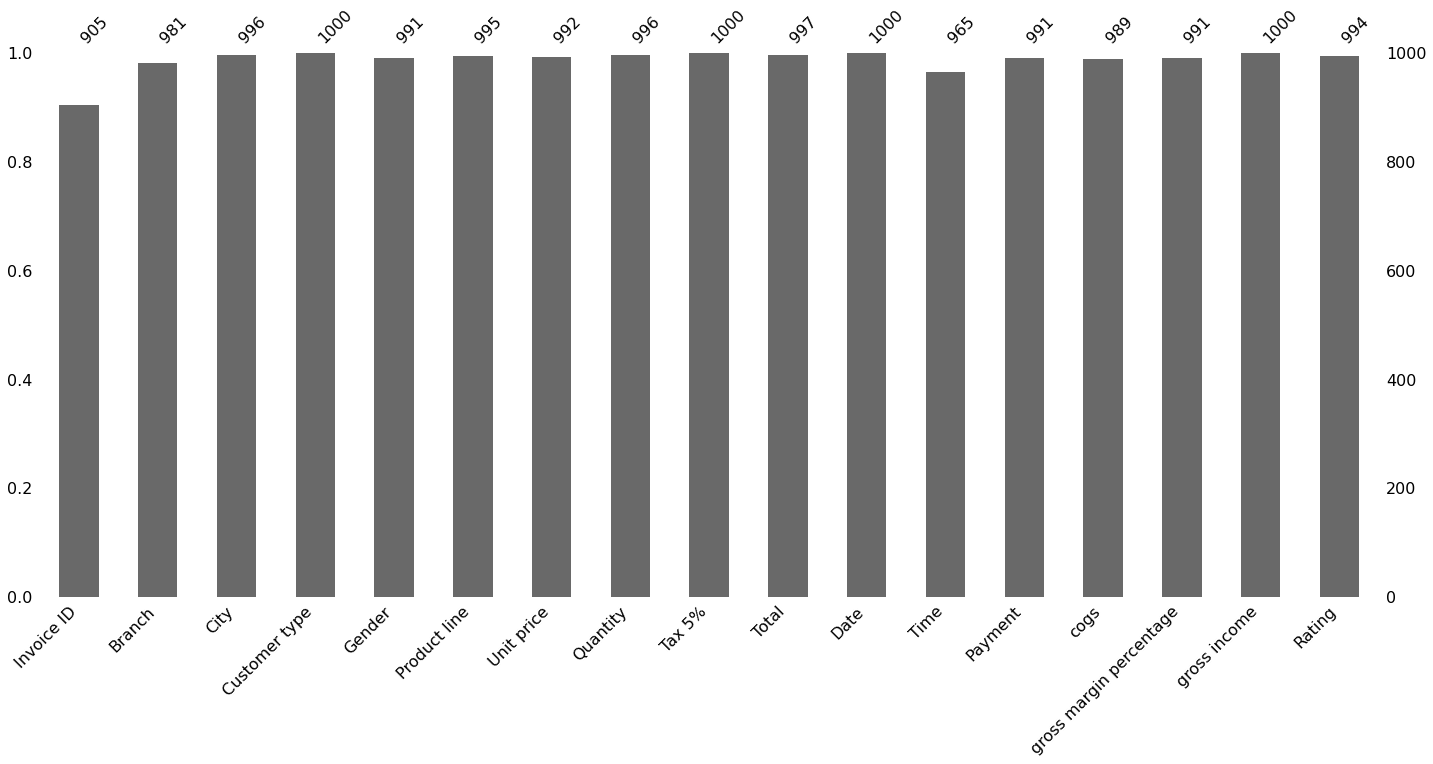

In [177]:
msno.bar(df)

> The barplot is a basic plot in which each bar represents one of the dataframe's columns. The height of the bar represents the column's completeness, or the number of non-null values present.

>The scale is measured in index values on the x-axis of the graphic. The upper right corner represents the dataframe's maximum amount of rows.

>The y-axis scale on the left side of the figure spans from 0.0 to 1.0, with 1.0 representing 100% data completeness. If the bar is smaller than this, it means that that column has missing values.

>There are a series of numbers along the top of the plot that show the overall count of non-null values inside that column.


#### Matrix Plot

<AxesSubplot:>

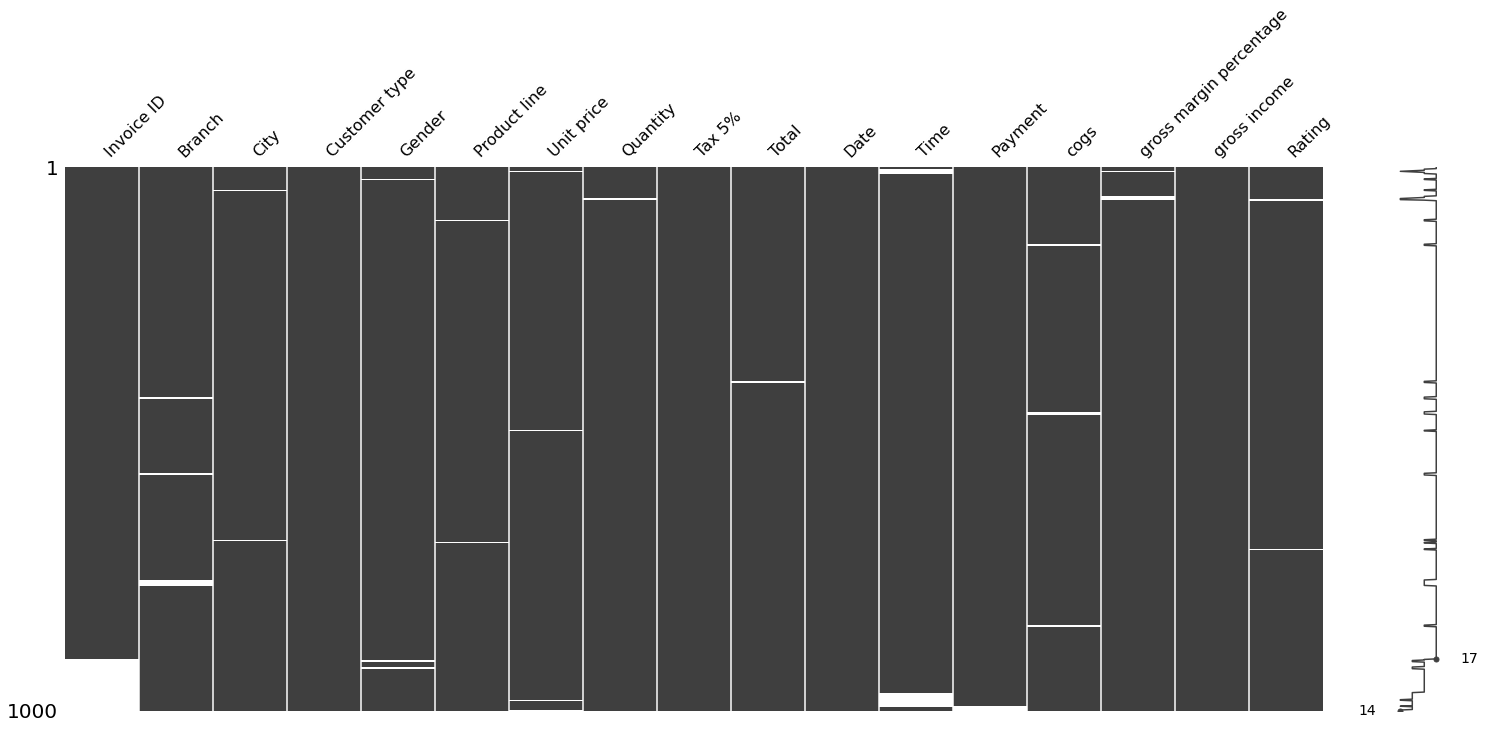

In [178]:
msno.matrix(df)

> It provides a colour fill for each column. When data is provided, the plot is coloured in grey (or your preferred colour), but when data is not present, the plot is white.

> As discussed above Invoice id and time shows alot of white space showing the missing values.

>Other columns also have white spaces indicating presence of null values.

> Missing values in other columns like humidity and windspeed also exist on the plot, the thiness of the like shows the small number of missing values as compared to total col.

#### Dendogram

<AxesSubplot:>

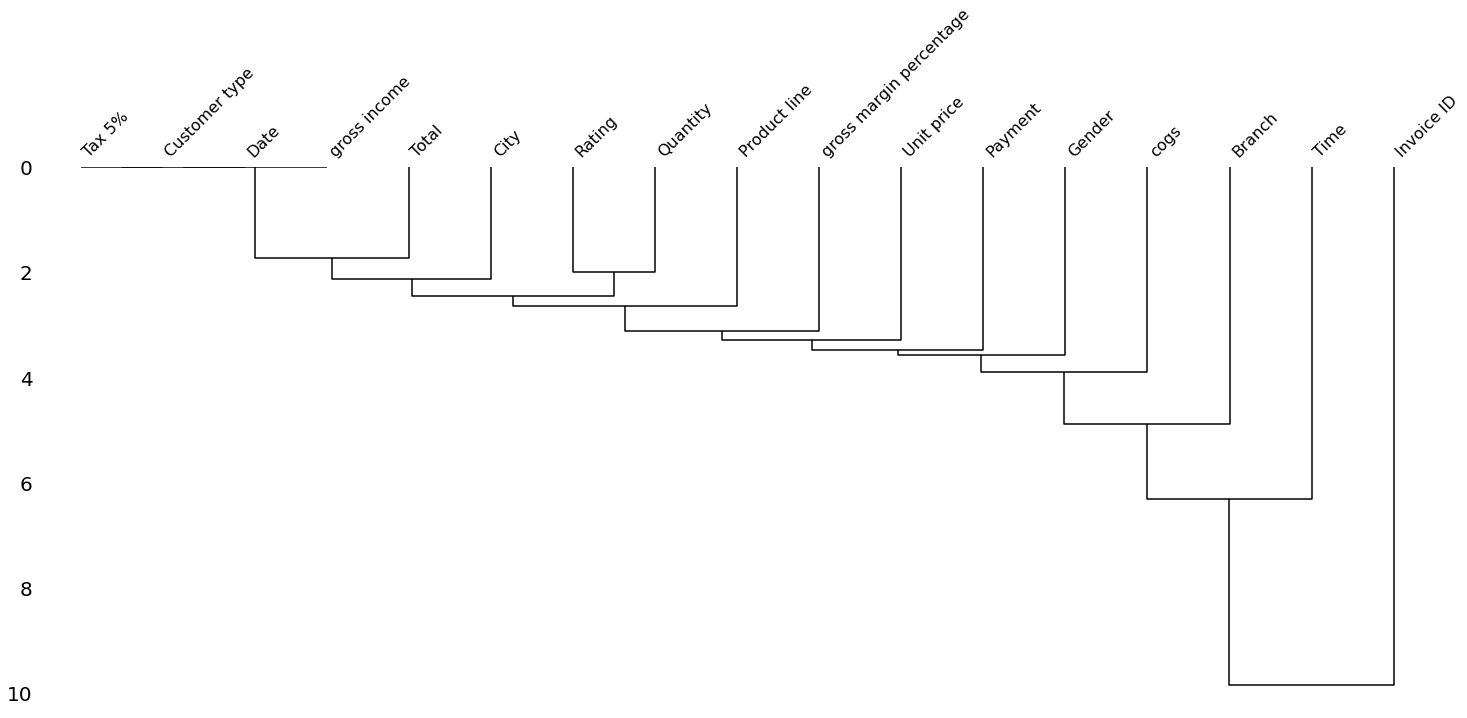

In [179]:
msno.dendrogram(df)

> The dendrogram plot is a tree-like graph formed by hierarchical clustering that groups together columns with high nullity correlations.
When a collection of columns is grouped at level zero, the presence or absence of nulls in one of the columns is directly connected to the presence or absence of nulls in the other columns. The more columns in the tree are isolated, the less likely null values will be connected between them.

>In this dataset no clear relation between is registered all the attributes are almost connected.

In [180]:
df.corr()

,Unit price,Tax 5%,cogs,Rating
Unit price,1.000000,0.635301,0.632043,-0.006881
Tax 5%,0.635301,1.000000,1.000000,-0.035488
cogs,0.632043,1.000000,1.000000,-0.039803
Rating,-0.006881,-0.035488,-0.039803,1.000000


The correlation between all the numerical columns is displayed.

#### Heatmap 

<AxesSubplot:>

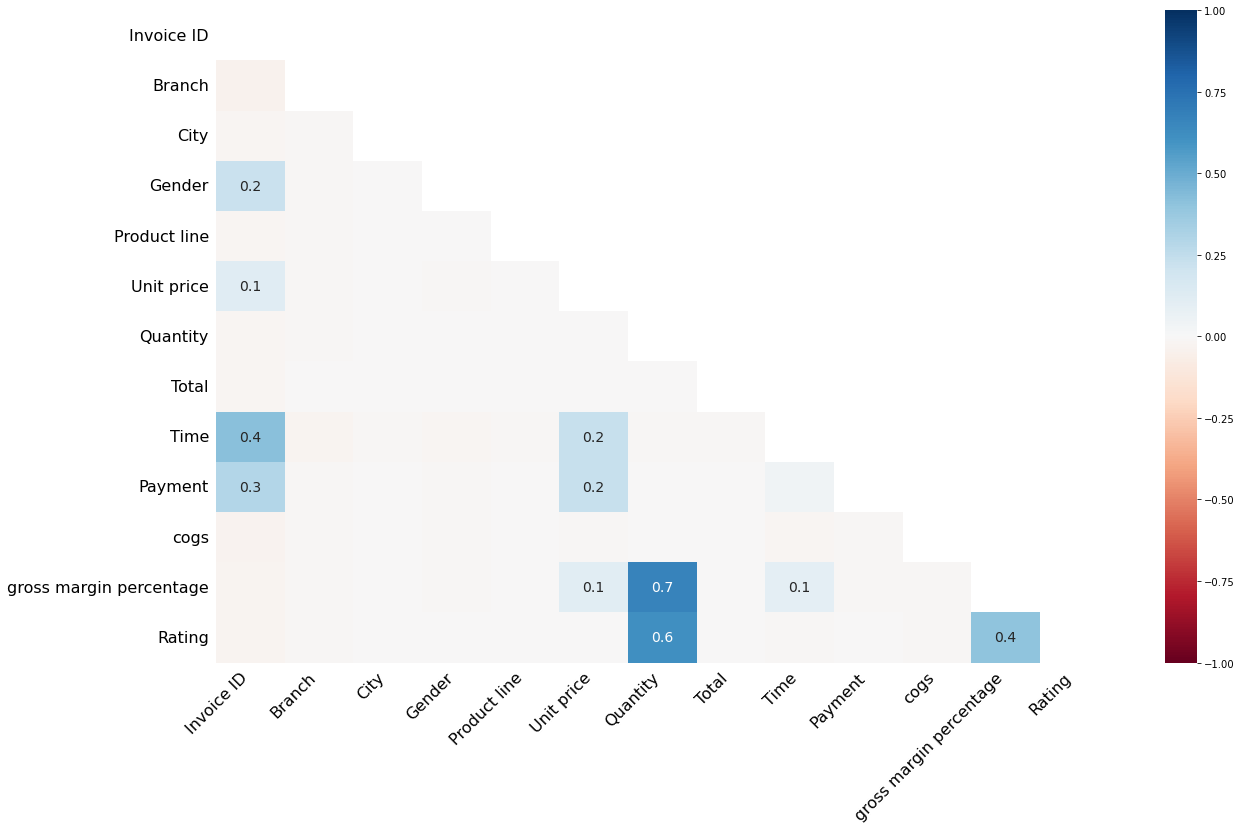

In [181]:
msno.heatmap(df)

>  It is used to see if there is a link between the columns when null values are present.

> Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

> There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.

>Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.

> Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.


>>>>> Since all the visulization of the data provided, it is clear the column of 'invoice id' have almost 10% of the values missing and each entry have unique invoice we can remove the columns and simply check the uniqueness of a row using indexies.

### Categorical And Numerical Column dealing mis-spelled and missing values 

#### Column = City 

In [182]:
df['City'].value_counts()

Yangon        335
Mandalay      329
Naypyitaw     324
Yangono         3
Yangon0         2
Naypyitay       1
Naypyitawe      1
Naypyitawp      1
Name: City, dtype: int64

In [183]:
## As we can see here that there are some spelling mistakes with the product line data so we will correct it first
Correct_index= df.loc[df['City'] == 'Yangono'].index.tolist() + df.loc[df['City'] == 'Yangon0'].index.tolist()+  df.loc[df['City'] == 'Naypyitay'].index.tolist() + df.loc[df['City'] == 'Naypyitawe'].index.tolist()+  df.loc[df['City'] == 'Naypyitawp'].index.tolist()
print(Correct_index)

[13, 14, 17, 16, 18, 140, 141, 143]


> As we can see the missing value in city is four and in branch is 19. If we study the data as shown in the graph each city have only one branch.

> We first check the value count in the city and find the spellings mistakes so we now go ahead and find the indexes on which we have wrong entry.


In [184]:
###The spelling mistakes in the city are corrected here
for index in Correct_index:
    if(df.loc[index,'City'] == 'Yangono' or  df.loc[index,'City'] == 'Yangon0'):
        df.loc[index,'City'] = 'Yangon'
    elif(df.loc[index,'City'] == 'Naypyitay' or df.loc[index,'City'] == 'Naypyitawe'  or df.loc[index,'City'] == 'Naypyitawp'):
        df.loc[index,'City'] = 'Naypyitaw'

print(df['City'].value_counts())

Yangon       340
Mandalay     329
Naypyitaw    327
Name: City, dtype: int64


> Here we target the indexes of the mis-spelled entries and their values we iterate over these values and correct them.

In [185]:
df[df['City'].isna()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
42,354-25-5821,B,NaN,Member,Female,Sports and travel,69.12,6,20.736,435.456,2/8/2019,13:03,Cash,414.72,4.761904762,20.736,5.6
43,228-96-1411,C,NaN,Member,Female,Food and beverages,98.70,8,39.480,829.08,3/4/2019,20:39,Cash,789.60,4.761904762,39.48,7.6
685,241-96-5076,B,NaN,Member,Female,Home and lifestyle,49.10,2,4.910,103.11,1/8/2019,12:58,Credit card,98.20,4.761904762,4.91,6.4
686,767-97-4650,B,NaN,Member,Female,Sports and travel,64.83,2,6.483,136.143,1/8/2019,11:59,Credit card,129.66,4.761904762,6.483,8.0


In [186]:
## the row number here are 42,43,685 and 686 we will chnge them and them verify if the function works correctly
##print(df[df['City'].isna()])
City_null = df[df['City'].isnull()].index.tolist()
print(City_null)

[42, 43, 685, 686]


In [187]:
for index in City_null:
    if(df.loc[index,'Branch'] == 'A'):
        df.loc[index,'City'] = 'Yangon'
    elif(df.loc[index,'Branch'] == 'B'):
        df.loc[index,'City'] = 'Mandalay'
    elif(df.loc[index,'Branch'] == 'C'):
        df.loc[index,'City'] = 'Naypyitaw'

> We see were their is a null entry in city column.
> save the indexes where city is null 
> we have 4 such values
> As we can see the graph above that where certain branch is in a certain city so we make relation such that 

  >> --> A   === Yangon    ...............
              --> B   === Mandalay ................
                      --> C   === Naypyitaw
    
> Then we simply fill the missing values while iterating over missing value indexes.

#### Column = Branch 

In [188]:
df['Branch'].value_counts()

A    332
C    325
B    324
Name: Branch, dtype: int64

In [189]:
##print(df.loc[[42]],df.loc[[43]],df.loc[[685]],df.loc[[686]])

In [190]:
Branch_null = df[df['Branch'].isnull()].index.tolist()
print(Branch_null)
for index in Branch_null:
    if(df.loc[index,'City'] == 'Yangon'):
        df.loc[index,'Branch'] = 'A'
    elif(df.loc[index,'City'] == 'Mandalay'):
        df.loc[index,'Branch'] = 'B'
    elif(df.loc[index,'City'] == 'Naypyitaw'):
        df.loc[index,'Branch'] = 'C'

[423, 424, 425, 426, 563, 564, 565, 566, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769]


> Here same goes for branch. find the missing value indexes and since there is only one branch in one city.
> we check the city and enter the branch.

>> For Yangon ----  A  ............ Mandalay ----  B ............  For Naypyitaw ----  C 

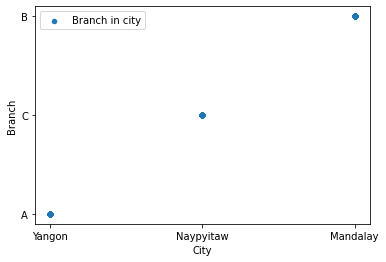

In [191]:
df.plot.scatter(x='City', y='Branch',label = 'Branch in city')
plt.legend()
plt.show()

In [192]:
df.isna().sum()

Invoice ID                 95
Branch                      0
City                        0
Customer type               0
Gender                      9
Product line                5
Unit price                  8
Quantity                    4
Tax 5%                      0
Total                       3
Date                        0
Time                       35
Payment                     9
cogs                       11
gross margin percentage     9
gross income                0
Rating                      6
dtype: int64

#### Column : Gender and Product line  

In [193]:
##Adding Gender not specified 
## 9 missing values are filled
df["Gender"].fillna("Not Specified", inplace=True);

In [194]:
df["Product line"].fillna("Unknown Product Line", inplace=True);

> For the gender column having missing value we consider that the gennder was not specified .
> Here we can simply add a new type of value that will be specifying that information was not present at the time of row entry.

> same goes for the product line we add the string unknown product line to the missing values

In [195]:
df['Product line'].value_counts()

Fashion accessories            177
Food and beverages             171
Electronic accessories         164
Sports and travel              163
Home and lifestyle             158
Health and beauty              151
Unknown Product Line             5
Electronic access                2
Sports and tr                    1
Electronic accessories+F327      1
Electr                           1
Food and bever                   1
Fashion access                   1
Health and bea                   1
Home and lifest                  1
Electronic a                     1
Sports and tra                   1
Name: Product line, dtype: int64

In [196]:
## As we can see here that there are some spelling mistakes with the product line data so we will correct it first
Correct_index= df.loc[df['Product line'] == 'Electronic access'].index.tolist() + df.loc[df['Product line'] == 'Sports and tr'].index.tolist()+  df.loc[df['Product line'] == 'Electronic accessories+F327'].index.tolist() + df.loc[df['Product line'] == 'Electr'].index.tolist()+  df.loc[df['Product line'] == 'Food and bever'].index.tolist() + df.loc[df['Product line'] == 'Fashion access'].index.tolist()+  df.loc[df['Product line'] == 'Health and bea'].index.tolist() + df.loc[df['Product line'] == 'Home and lifest'].index.tolist()+  df.loc[df['Product line'] == 'Electronic a'].index.tolist() +  df.loc[df['Product line'] == 'Sports and tra'].index.tolist()
print(Correct_index)

[209, 238, 325, 296, 295, 81, 124, 104, 56, 55, 344]


In [197]:
###The spelling mistakes in the product line are corrected here
for index in Correct_index:
    if(df.loc[index,'Product line'] == 'Electronic access' or  df.loc[index,'Product line'] == 'Electronic accessories+F327' or df.loc[index,'Product line'] =='Electronic a' or df.loc[index,'Product line'] == 'Electr'):
        df.loc[index,'Product line'] = 'Electronic accessories'
    elif(df.loc[index,'Product line'] == 'Sports and tr' or df.loc[index,'Product line'] == 'Sports and tra'):
        df.loc[index,'Product line'] = 'Sports and travel'
    elif(df.loc[index,'Product line'] == 'Food and bever'):
        df.loc[index,'Product line'] = 'Food and beverages'
    elif(df.loc[index,'Product line'] == 'Fashion access'):
        df.loc[index,'Product line'] = 'Fashion accessories'
    elif(df.loc[index,'Product line'] == 'Health and bea'):
        df.loc[index,'Product line'] = 'Health and beauty'
    elif(df.loc[index,'Product line'] == 'Home and lifest'):
        df.loc[index,'Product line'] = 'Home and lifestyle'

> The value count of product line shows the mis-spelled values in the column.
> Same approach is used as above we get the indexes of mis-spelled values and correct them while iterating over the mis-spelled values index.

In [198]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        172
Electronic accessories    169
Sports and travel         165
Home and lifestyle        159
Health and beauty         152
Unknown Product Line        5
Name: Product line, dtype: int64

#### Column: Unit price

In [199]:
##For unit price we can take median of the unit price of certain product line
import statistics
Unit_price_null = df[df['Unit price'].isnull()].index.tolist()

Fashion_accessories = df.loc[df['Product line'] == 'Fashion accessories'].index.tolist()
Food_and_beverages  = df.loc[df['Product line'] == 'Food and beverages'].index.tolist()
Electronic_accessories  = df.loc[df['Product line'] == 'Electronic accessories'].index.tolist()
Sports_and_travel   = df.loc[df['Product line'] == 'Sports and travel'].index.tolist()
Home_and_lifestyle  = df.loc[df['Product line'] == 'Home and lifestyle'].index.tolist()
Health_and_beauty = df.loc[df['Product line'] == 'Health and beauty'].index.tolist()
Unknown_Product_Line = df.loc[df['Product line'] == 'Home and lifestyle'].index.tolist()

For missing value in unit price col:
we find the median of unit price of a certain type of product line
The indexes for every product line and compiled to a list

In [200]:
def commonelems(x,y):
    for value in x:
        if value in y:
                y.remove(value)
    return y

In [201]:
Fashion_accessories = commonelems(Unit_price_null,Fashion_accessories)
Food_and_beverages  = commonelems(Unit_price_null,Food_and_beverages)
Electronic_accessories  = commonelems(Unit_price_null,Electronic_accessories)
Sports_and_travel   =commonelems(Unit_price_null,Sports_and_travel)
Home_and_lifestyle  = commonelems(Unit_price_null,Home_and_lifestyle)
Health_and_beauty = commonelems(Unit_price_null,Health_and_beauty)
Unknown_Product_Line = commonelems(Unit_price_null,Unknown_Product_Line)

>We make an array of indexes where unit price is null.

>we remove the indexes which are in the null unit price array from the product line arrays.

>This step make sure that the median is calculated correctly and have no null unit price involved. 

In [202]:
def median_Unitprice_per_productline(product_line):
    array = []
    for index in product_line:
        array.append(df.loc[index,'Unit price'])
    return statistics.median(array)

def median_Total_per_productline(product_line):
    array = []
    for index in product_line:
        array.append(df.loc[index,'Total'])
    print(array,'\n')
    return statistics.median(array)
    

In [203]:
F_A=median_Unitprice_per_productline(Fashion_accessories)
F_B=median_Unitprice_per_productline(Food_and_beverages)
E_A=median_Unitprice_per_productline(Electronic_accessories)
S_T=median_Unitprice_per_productline(Sports_and_travel)
H_L=median_Unitprice_per_productline(Home_and_lifestyle)
H_B=median_Unitprice_per_productline(Health_and_beauty)
Un=median_Unitprice_per_productline(Unknown_Product_Line)
print(F_A,F_B,E_A,S_T,H_L,H_B,Un)

54.73 53.21 51.69 58.91 54.504999999999995 57.59 54.504999999999995


In [204]:
for index in Unit_price_null:
    if(df.loc[index,'Product line'] == 'Fashion accessories'):
        df.loc[index,'Unit price'] = F_A
    elif(df.loc[index,'Product line'] == 'Food and beverages'):
        df.loc[index,'Unit price'] = F_B
    elif(df.loc[index,'Product line'] == 'Electronic accessories'):
        df.loc[index,'Unit price'] = E_A
    elif(df.loc[index,'Product line'] == 'Sports and travel'):
        df.loc[index,'Unit price'] = S_T
    elif(df.loc[index,'Product line'] == 'Home and lifestyle'):
        df.loc[index,'Unit price'] = H_L
    elif(df.loc[index,'Product line'] == 'Health and beauty'):
        df.loc[index,'Unit price'] = H_B
    elif(df.loc[index,'Product line'] == 'Unknown Product Line'):
        df.loc[index,'Unit price'] = Un

> For every product line the median of unit price is calculated.

> These values are filled according to the type of product line the index belong to.

In [205]:
df.isna().sum()

Invoice ID                 95
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  0
Quantity                    4
Tax 5%                      0
Total                       3
Date                        0
Time                       35
Payment                     9
cogs                       11
gross margin percentage     9
gross income                0
Rating                      6
dtype: int64

#### Column : Quantity 

In [206]:
df['Quantity'].value_counts()

10       117
1        111
4        109
7        102
5        102
6         97
9         92
2         90
3         89
8         83
few%&      1
%*&        1
*(()       1
few        1
Name: Quantity, dtype: int64

In [207]:
## As we can see here that there are some spelling mistakes with the product line data so we will correct it first
Correct_index= df.loc[df['Quantity'] == 'few%&'].index.tolist() + df.loc[df['Quantity'] == '%*&'].index.tolist()+df.loc[df['Quantity'] == '*(()'].index.tolist() + df.loc[df['Quantity'] == 'few'].index.tolist()
print(Correct_index)

##There can be two ways to solve this one with using the mode fuction as given above and below the mode for all the product line
##is ten we can rather introdute a new quantity represented by 0 here 0 show that the number of quantity entered are miswritten or
##are simply not entered
##Quantity ---  0  indicates no specified or mistyped quantity
for index in Correct_index:
    df.loc[index,'Quantity'] = '0'
df["Quantity"].fillna("0", inplace=True);

[223, 244, 357, 381]


> First we find the mis-spelled values in the quantity column.

> These values are first replaced by null.

> All the null values in quantity are replaced by the number 0 showing the quantity was not specified at the time of invoice.

In [208]:
df.isna().sum()

Invoice ID                 95
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       3
Date                        0
Time                       35
Payment                     9
cogs                       11
gross margin percentage     9
gross income                0
Rating                      6
dtype: int64

#### Column : Total  And Gross Income

In [209]:
df['Total'].value_counts()

216.846     2
217.6335    2
87.234      2
189.0945    2
470.988     2
           ..
150.0975    1
404.649     1
151.4835    1
411.3795    1
649.299     1
Name: Total, Length: 987, dtype: int64

In [210]:
df['Total']

0      548.9715
1         80.22
2      340.5255
3       489.048
4      634.3785
         ...   
995     42.3675
996     1022.49
997      33.432
998      69.111
999     649.299
Name: Total, Length: 1000, dtype: object

In [211]:
Total_Err = df.loc[df['Total'] == '#####'].index.tolist() + df.loc[df['Total'] == '$$$$$$$'].index.tolist() + df.loc[df['Total'] == 'very high'].index.tolist()+ df.loc[df['Total'] == 'whoa'].index.tolist()+ df.loc[df['Total'] == 'toolow'].index.tolist()
print(Total_Err)
for x in Total_Err:
    df.loc[x,'Total'] = np.nan

df = df.astype({"Total": float})

[306, 391, 412, 433, 518]


Total columns have some values which don't belong there so we find there indexes and replace them with null.
Further we deal with these null values. At this point we also change the datya types of total column from object to float.

In [212]:
df.isna().sum() ##Here the missing value of total increases as we correct spellin misstakes 

Invoice ID                 95
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       8
Date                        0
Time                       35
Payment                     9
cogs                       11
gross margin percentage     9
gross income                0
Rating                      6
dtype: int64

In [213]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                    object
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage     object
gross income                object
Rating                     float64
dtype: object

In [214]:
df['gross income'].value_counts()

low        4
10.326     2
8.377      2
4.154      2
9.0045     2
          ..
7.1475     1
19.269     1
7.2135     1
19.5895    1
30.919     1
Name: gross income, Length: 987, dtype: int64

In [215]:
Gross_income_Err = df.loc[df['gross income'] == 'low'].index.tolist() + df.loc[df['gross income'] == 'high'].index.tolist()
print(Gross_income_Err )
for index in Gross_income_Err:
    total = df.loc[index,'Total']
    cogs = df.loc[index,'cogs']
    sum = total-cogs
    df.loc[index,'gross income'] = sum 

[702, 703, 704, 958, 845]


>There is relation between columns Total, gross income and cogs 

>>>cogs = Total -gross income 

> Here we first see the column gross income find the mis-spelled values replace it with the null values.

> We fill the null values using the relation above which shows that gross income equals to  total minus cogs value.

>>> gross income = Total - cogs 

In [216]:
## Here we fill missing values in total column with the median of total of a specific product line
df = df.astype({"gross income": float})
##df["gross income"] = pd.to_numeric(s, errors='ignore')


Total_null = df[df['Total'].isnull()].index.tolist()

for index in Total_null:
    cogs=df.loc[index,'cogs']
    gross_income= df.loc[index,'gross income']
    df.loc[index,'Total'] = cogs + gross_income

##df.type()



>Total = gross income + cogs

> Using the above relation we calculate total. The dtype of gross income is change to float and then total is calculated.

In [217]:
df.isna().sum()

Invoice ID                 95
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                       35
Payment                     9
cogs                       11
gross margin percentage     9
gross income                0
Rating                      6
dtype: int64

#### Column : Payment 

In [218]:
df['Payment'].value_counts()

Ewallet        338
Cash           338
Credit card    311
123              1
444              1
332              1
98               1
Name: Payment, dtype: int64

In [219]:
Payment_Err = df.loc[df['Payment'] == '123'].index.tolist() + df.loc[df['Payment'] == '444'].index.tolist() + df.loc[df['Payment'] == '332'].index.tolist()+ df.loc[df['Payment'] == '98'].index.tolist()
print(Payment_Err)
for x in Payment_Err:
    df.loc[x,'Payment'] = np.nan

[856, 857, 858, 886]


In [220]:
df.isna().sum()

Invoice ID                 95
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                       35
Payment                    13
cogs                       11
gross margin percentage     9
gross income                0
Rating                      6
dtype: int64

In [221]:
## we will fill the payment missing value with a string value stating that mode of payment was unidentified
df["Payment"].fillna("unidentified mode of payment", inplace=True);

>>>The payment also have mis-spelled values. These are replace with null. The null values are filled with a new string "unidentified mode of payment" showing the type or mode of payment was not specified. 

#### Column : gross margin percentage and Customer type

In [222]:
df['gross margin percentage'].value_counts()

4.761904762    986
same             2
5                2
1                1
Name: gross margin percentage, dtype: int64

In [223]:
##  missing values of gross margin percentage are replaced by the mode value
Gm_Err = df.loc[df['gross margin percentage'] == 'same'].index.tolist() 
for x in Gm_Err:
    df.loc[x,'gross margin percentage'] = np.nan
df["gross margin percentage"].fillna("4.761904762", inplace=True);

Mis-spelled values in gross margin percentage are replaced with null and he missing values of gross margin are replaced by the mode.

In [224]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

#### Column : Rating 

In [225]:
## missing value of rating
#we can fill in the missing value using type of customer and type of product line
 
def common_of_two_cols(x,y):
    array = []
    for value in x:
        if value in y:
            array.append(value)
    return array
def median_Rating_per_CusBr(x):
    array = []
    for index in x:
        array.append(df.loc[index,'Rating'])
    return statistics.median(array)

Rating_null = df[df['Rating'].isnull()].index.tolist()
            
B_A= df.loc[df['Branch'] == 'A'].index.tolist()
B_B= df.loc[df['Branch'] == 'B'].index.tolist()
B_C= df.loc[df['Branch'] == 'C'].index.tolist()
B_N= df.loc[df['Customer type'] == 'Normal'].index.tolist()
B_M= df.loc[df['Customer type'] == 'Member'].index.tolist()

b_A_N = common_of_two_cols(B_A,B_N)
b_A_M = common_of_two_cols(B_A,B_M)

b_B_N = common_of_two_cols(B_B,B_N)
b_B_M = common_of_two_cols(B_B,B_M)

b_C_N = common_of_two_cols(B_C,B_N)
b_C_M = common_of_two_cols(B_C,B_M)

b_A_N = commonelems(Rating_null,b_A_N)
b_A_M = commonelems(Rating_null,b_A_M)
b_B_N = commonelems(Rating_null,b_B_N)
b_B_M = commonelems(Rating_null,b_B_M)
b_C_N = commonelems(Rating_null,b_C_N)
b_C_M = commonelems(Rating_null,b_C_M)

Mb_A_N = median_Rating_per_CusBr(b_A_N)
Mb_A_M = median_Rating_per_CusBr(b_A_M)
Mb_B_N = median_Rating_per_CusBr(b_B_N)
Mb_B_M = median_Rating_per_CusBr(b_B_M)
Mb_C_N = median_Rating_per_CusBr(b_C_N)
Mb_C_M = median_Rating_per_CusBr(b_C_M)

for index in Rating_null:
    if(df.loc[index,'Branch'] == 'A'  and df.loc[index,'Customer type'] == 'Normal'):
        df.loc[index,'Rating'] = Mb_A_N
    elif(df.loc[index,'Branch'] == 'A'  and df.loc[index,'Customer type'] == 'Member'):
        df.loc[index,'Rating'] = Mb_A_M
    elif(df.loc[index,'Branch'] == 'B'  and df.loc[index,'Customer type'] == 'Normal'):
        df.loc[index,'Rating'] = Mb_B_N
    elif(df.loc[index,'Branch'] == 'B'  and df.loc[index,'Customer type'] == 'Member'):
        df.loc[index,'Rating'] = Mb_B_M
    elif(df.loc[index,'Branch'] == 'C'  and df.loc[index,'Customer type'] == 'Normal'):
        df.loc[index,'Rating'] = Mb_C_N
    elif(df.loc[index,'Branch'] == 'C'  and df.loc[index,'Customer type'] == 'Member'):
        df.loc[index,'Rating'] = Mb_C_M

> The rating is calculated on the basis of customer type and Branch

> First we calculate the the missing value indexes in rating. Then we find indexes of Branch and customer type values separetely. Now we pair each value of branch with customer type's each value. This gives six different variations. 

> These indexes compare with the null indexes of rating to make sure that we don't have any null values of rating in the six variation. 

>We further find the median on these six variation. Now we iterate on the null rating indexes to fill them with the median on the basis of these six variation.

>> 1) A --- normal    .....    2) A --- Member   ......  3) B --- normal    .....   4) B --- Member  .....  5) C --- normal    .....    6) C --- Member

#### Column : cogs 

In [226]:
##cogs is the cost of goods sold 
##Beginning Inventory (at the beginning of the year) -- > Plus Purchases and Other Costs.
## ----> Minus Ending Inventory (at the end of the year) -----> Equals Cost of Goods Sold
#its basically total minus the gross income

Cogs_null = df[df['cogs'].isnull()].index.tolist()

for index in Cogs_null:
    df.loc[index,'cogs'] = (df.loc[index,'Total'] - df.loc[index,'gross income']) 

The cogs is calculated using the formular:

>cogs = total - gross income

Here simply we find the indexes where cogs is null then we iterate on these and calculate cogs with repect to total and gross income value on the index.

In [227]:
df.isna().sum()

Invoice ID                 95
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                       35
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [228]:
##mode function not used further
def mode_Time_CusBr(Branch):
    array = []
    for index in Branch:
        array.append(df.loc[index,'Time'])
    modeF=statistics.mode(array)
    print(modeF)
    return modeF


Time_null = df[df['Time'].isnull()].index.tolist()
            
B_A= df.loc[df['Branch'] == 'A'].index.tolist()
B_B= df.loc[df['Branch'] == 'B'].index.tolist()
B_C= df.loc[df['Branch'] == 'C'].index.tolist()
B_N= df.loc[df['Customer type'] == 'Normal'].index.tolist()
B_M= df.loc[df['Customer type'] == 'Member'].index.tolist()

b_A_N = common_of_two_cols(B_A,B_N)
b_A_M = common_of_two_cols(B_A,B_M)

b_B_N = common_of_two_cols(B_B,B_N)
b_B_M = common_of_two_cols(B_B,B_M)

b_C_N = common_of_two_cols(B_C,B_N)
b_C_M = common_of_two_cols(B_C,B_M)

b_A_N = commonelems(Time_null,b_A_N)
b_A_M = commonelems(Time_null,b_A_M)
b_B_N = commonelems(Time_null,b_B_N)
b_B_M = commonelems(Time_null,b_B_M)
b_C_N = commonelems(Time_null,b_C_N)
b_C_M = commonelems(Time_null,b_C_M)

Mb_A_N = mode_Time_CusBr(b_A_N)
Mb_A_M = mode_Time_CusBr(b_A_M)
Mb_B_N = mode_Time_CusBr(b_B_N)
Mb_B_M = mode_Time_CusBr(b_B_M)
Mb_C_N = mode_Time_CusBr(b_C_N)
Mb_C_M = mode_Time_CusBr(b_C_M)

for index in Time_null:
    if(df.loc[index,'Branch'] == 'A'  and df.loc[index,'Customer type'] == 'Normal'):
        df.loc[index,'Time'] = Mb_A_N
    elif(df.loc[index,'Branch'] == 'A'  and df.loc[index,'Customer type'] == 'Member'):
        df.loc[index,'Time'] = Mb_A_M
    elif(df.loc[index,'Branch'] == 'B'  and df.loc[index,'Customer type'] == 'Normal'):
        df.loc[index,'Time'] = Mb_B_N
    elif(df.loc[index,'Branch'] == 'B'  and df.loc[index,'Customer type'] == 'Member'):
        df.loc[index,'Time'] = Mb_B_M
    elif(df.loc[index,'Branch'] == 'C'  and df.loc[index,'Customer type'] == 'Normal'):
        df.loc[index,'Time'] = Mb_C_N
    elif(df.loc[index,'Branch'] == 'C'  and df.loc[index,'Customer type'] == 'Member'):
        df.loc[index,'Time'] = Mb_C_M

10:12
15:48
19:48
13:40
10:23
16:24


> The missing values of time is calculated according to the branch and customer type.

> First the null value indexes of time are found

> We find the indexes of each value of customer type and branch. Then these are made in pairs, like each value of branch is paired with each value of customer type making six variation.

> They are compared with the null_time indexes to show that no index from time_null is in these six variation.

> The mode of time is calculated on the basis of these six variation. Then they also filled in the places of null value places.

In [229]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761904762,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761904762,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761904762,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761904762,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:12,Ewallet,604.17,4.761904762,30.2085,5.3


In [230]:
df.dtypes


Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                    object
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage     object
gross income               float64
Rating                     float64
dtype: object

In [231]:
## the data type of gross marfin  percentage and quantity are changed to float
df = df.astype({"gross margin percentage": float,"Quantity": float})

data type of gross marfin  percentage and quantity are changed to float

In [232]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,NaN,C,Naypyitaw,Normal,Male,Health and beauty,40.350,1.0,2.0175,42.3675,1/29/2019,13:46,unidentified mode of payment,40.35,4.761905,2.0175,6.2
996,NaN,B,Mandalay,Normal,Female,Home and lifestyle,97.380,10.0,48.6900,1022.4900,3/2/2019,17:16,unidentified mode of payment,973.80,4.761905,48.6900,4.4
997,NaN,A,Yangon,Member,Male,Food and beverages,31.840,1.0,1.5920,33.4320,2/9/2019,13:22,unidentified mode of payment,31.84,4.761905,1.5920,7.7
998,NaN,A,Yangon,Normal,Male,Home and lifestyle,54.505,1.0,3.2910,69.1110,2/22/2019,15:33,unidentified mode of payment,65.82,4.761905,3.2910,4.1
999,NaN,A,Yangon,Member,Female,Fashion accessories,54.730,7.0,30.9190,649.2990,2//2019,13:28,unidentified mode of payment,618.38,4.761905,30.9190,6.6


> This shows that most of the ending rows have all the values as nan for the col payment which were filled with the string 'unidentified mode of payment'.

# Transformation

### Droping a column

In [233]:
df = df.drop("Invoice ID", axis=1)

Invoice id column is droped

In [234]:
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

> And as we can see the total number of null display shows a 0 meaning we have dealt all the missing values.

### Renaming the column

In [235]:
df.rename(columns={'Customer type':'Customer_type'},inplace=True)
df.rename(columns={'Product line':'Product_line'},inplace=True)
df.rename(columns={'Unit price':'Unit_price'},inplace=True)
df.rename(columns={'Tax 5%':'Tax_5_per'},inplace=True)
df.rename(columns={'gross margin percentage':'gross_margin_percentage'},inplace=True)
df.rename(columns={'gross income':'gross_income'},inplace=True)

The columns having spaces in there name are renamed to that the further tests can run properly. 

# Outliers

First we see how many numeric columns do we have.

In [236]:
def get_cols_type(df):
    types_of_col = df.dtypes.to_dict()
    numeric_cols = []
    category_cols = []
    for m,p in types_of_col.items():
        if np.issubdtype(np.int64, p) or np.issubdtype(np.float64, p):
            numeric_cols.append(m)
        if not( np.issubdtype(np.int64, p) or np.issubdtype(np.float64, p)):
            category_cols.append(m)

    return numeric_cols,category_cols

In [237]:
Numeric_columns_list, categorical_columns_list = get_cols_type(df)
print(Numeric_columns_list)
print(categorical_columns_list)

['Unit_price', 'Quantity', 'Tax_5_per', 'Total', 'cogs', 'gross_margin_percentage', 'gross_income', 'Rating']
['Branch', 'City', 'Customer_type', 'Gender', 'Product_line', 'Date', 'Time', 'Payment']


In the method above the numeric columns and categorical columns are separated and a list is formed which will be further used to plot and visualize the data.

In [238]:
# Box Plot
def box_plots(Numeric_columns_list, df):
    for i in range(len(Numeric_columns_list)-1):
        plt.figure(figsize=(9, 4), dpi = 100)
        sns.boxplot(x = df[Numeric_columns_list[i]])

# Distribution plots
def dis_plots(Numeric_columns_list, df): 
    for i in range(len(Numeric_columns_list)-1):
        plt.figure(figsize=(10, 5), dpi = 100)
        sns.displot(df[Numeric_columns_list[i]])

The methods for box plot and distribution plot are made for further use.

## Distributive Analysis 

### Box Plot for numerical columns 

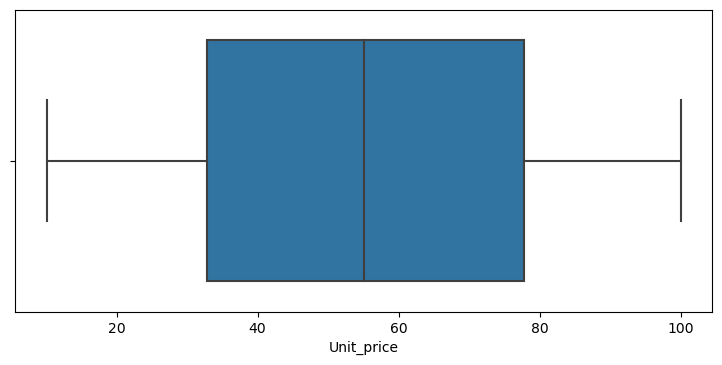

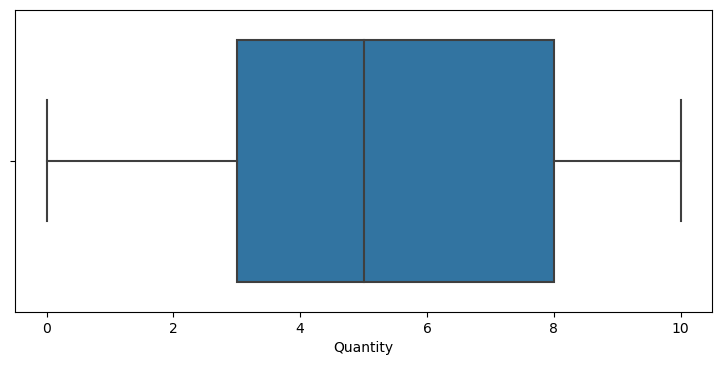

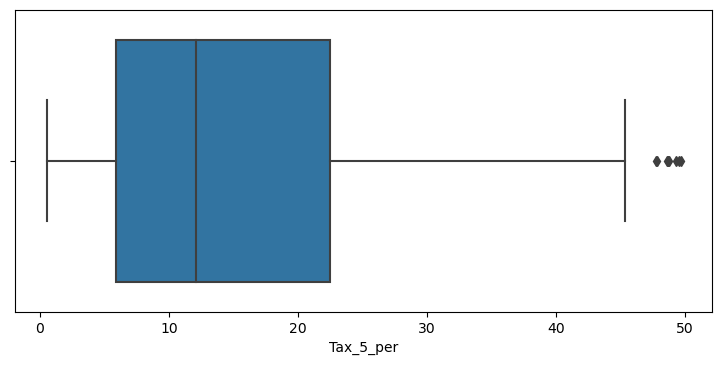

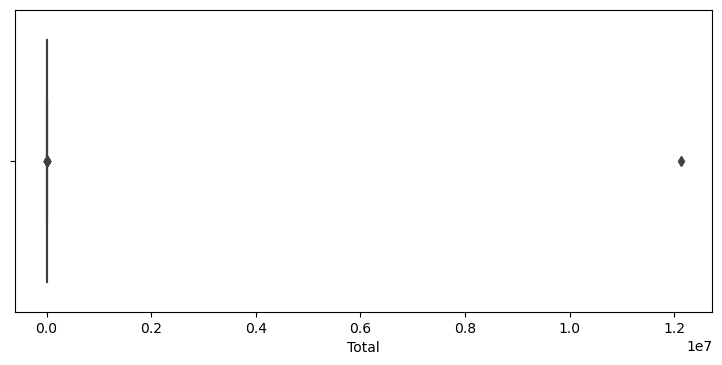

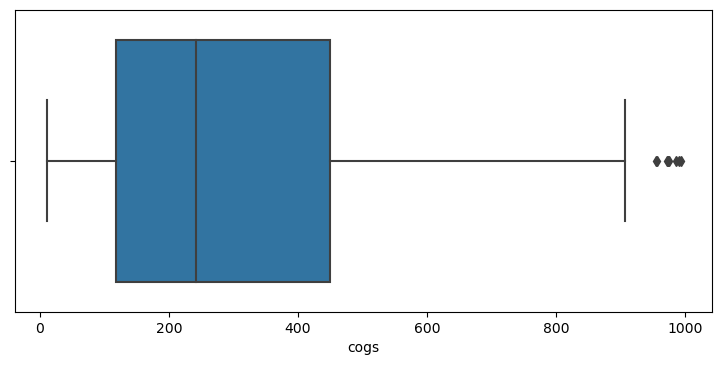

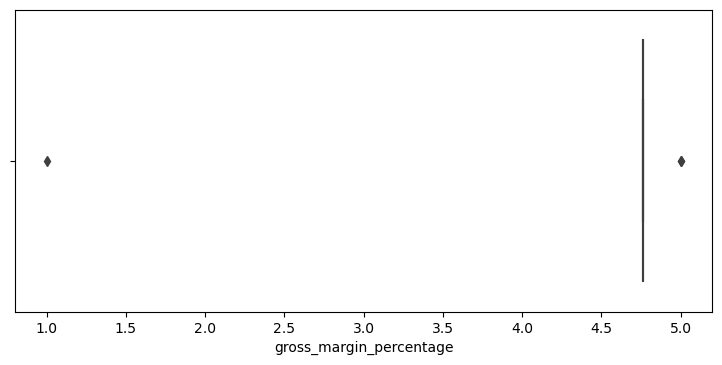

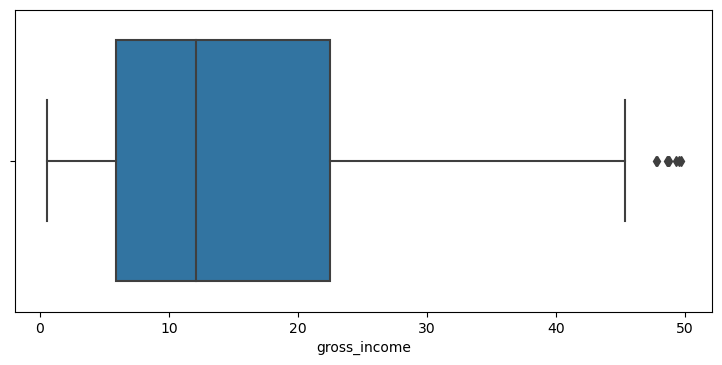

In [239]:
##Numeric_columns_list= 
##   ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

box_plots(Numeric_columns_list, df)

A boxplot is a graphic that displays a five-number summary. The major component of the chart (the "box") depicts the interquartile range, which is the centre portion of the data. The first quartile (the 25% mark) and the third quartile are located at the box's ends (the 75 percent mark).

>> The outliers are detacted in   ------------
>>      Tax 5% column at 50  ---------------------------
>>      gross income at 50 -----------------------
>>       cogs at 1000       -----------------------

>>     Gross margin percentage shows outliers but depicts weird behaviour. Since gross margin have three kind of values so the plot is justified showing two outliers most probably one.

>> The total colums since have very big values as the entries so it shows ouliers at 1.2le7
>1e7 indicates that the x-axis values should be multiplied by 1e7 (which is 1 x 10^7) or 10,000,000 (ten million).

In [240]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit_price,1000.0,55.657315,26.455833,10.0800,32.875000,55.055000,77.772500,99.96
Quantity,1000.0,5.462000,2.948771,0.0000,3.000000,5.000000,8.000000,10.00
Tax_5_per,1000.0,15.379369,11.708825,0.5085,5.924875,12.088000,22.445250,49.65
Total,1000.0,12456.498909,383306.887185,10.6785,125.401500,255.165750,475.043625,12121555.00
cogs,1000.0,307.587380,234.176510,10.1700,118.497500,241.760000,448.905000,993.00
gross_margin_percentage,1000.0,4.758619,0.119452,1.0000,4.761905,4.761905,4.761905,5.00
gross_income,1000.0,15.379369,11.708825,0.5085,5.924875,12.088000,22.445250,49.65
Rating,1000.0,6.968250,1.711167,4.0000,5.500000,7.000000,8.400000,10.00


It calculates the statistical information of the numerical values. 

<AxesSubplot:>

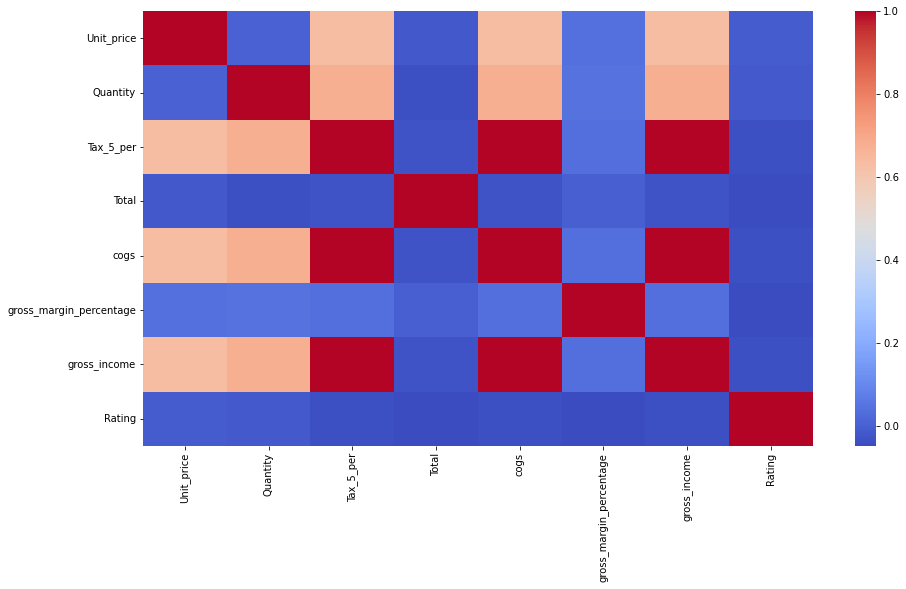

In [241]:
fig, ax = plt.subplots(figsize=(15,8))       
sns.heatmap(df.corr(), cmap= 'coolwarm')

Correlation ranges between -1 and +1. Closer to 0 indicates that there is no linear relationship between the two variables. The closer the correlation is to one, the more positively associated they are; that is, when one rises, so does the other, and the closer to one they are, the stronger the association.

>> The corelation between tax 5% and gross income is strong same for tax 5% and cogs and also relation between cogs and gross income. These three attributes ahve strong relation.

>>Quantity also have a correlation with tax5%, gross income and cogs. Its not strong but its there. 

>>Unit price is also weakly correlated with gross income, cogs and tax 5%.



<Figure size 1000x500 with 0 Axes>

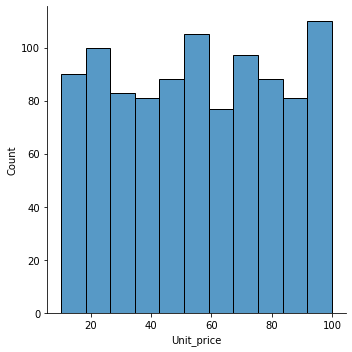

<Figure size 1000x500 with 0 Axes>

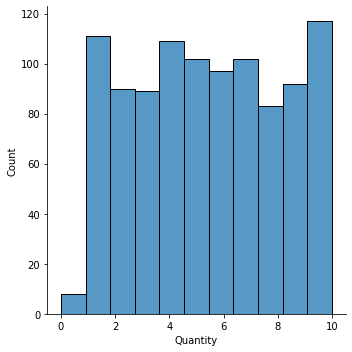

<Figure size 1000x500 with 0 Axes>

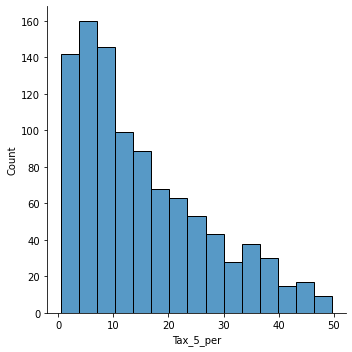

<Figure size 1000x500 with 0 Axes>

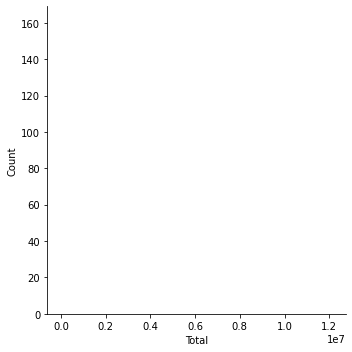

<Figure size 1000x500 with 0 Axes>

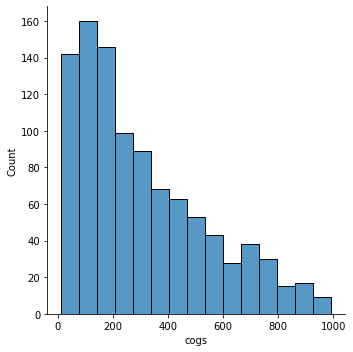

<Figure size 1000x500 with 0 Axes>

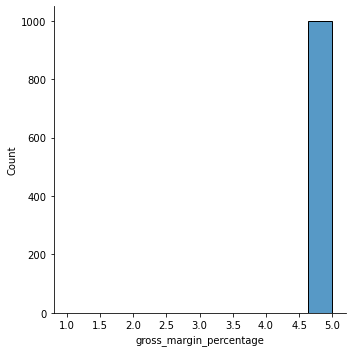

<Figure size 1000x500 with 0 Axes>

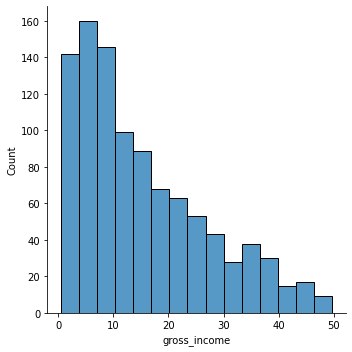

In [242]:
# distribution of column
dis_plots(Numeric_columns_list, df)


> The distribution graphs shows the patterns followed by different data as:

>>>Uniy price have a minimum count of 80.

>>>Maximum of quantity is 10 except for the 0 value that was added to represent not  specified the averahe count seems to be 10 having a count of almost 120.

>>> Tax 5% , cogs and gross income shows a decreasing state. This also refers to the point of correlation.

>>>Total again have le7 that means the values are too big.

>>>gross margin percentage have the range between 4.5 and 5.


<AxesSubplot:title={'center':'cogs/gross_income'}, xlabel='cogs', ylabel='gross_income'>

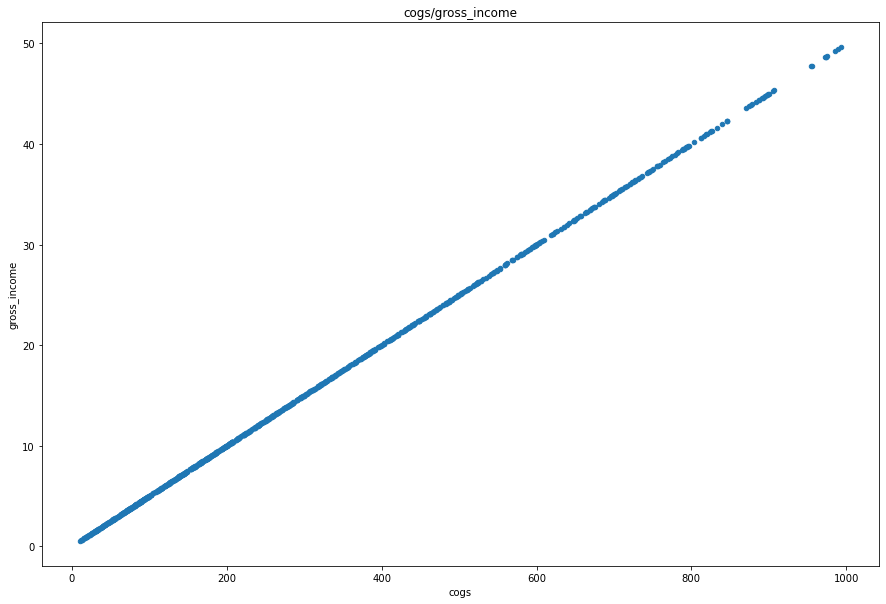

In [250]:
df.plot.scatter(x='cogs', y='gross_income',  figsize=(15,10), sharex=False,
                     title='cogs/gross_income')

<AxesSubplot:title={'center':'cogs/tax5%'}, xlabel='cogs', ylabel='Tax_5_per'>

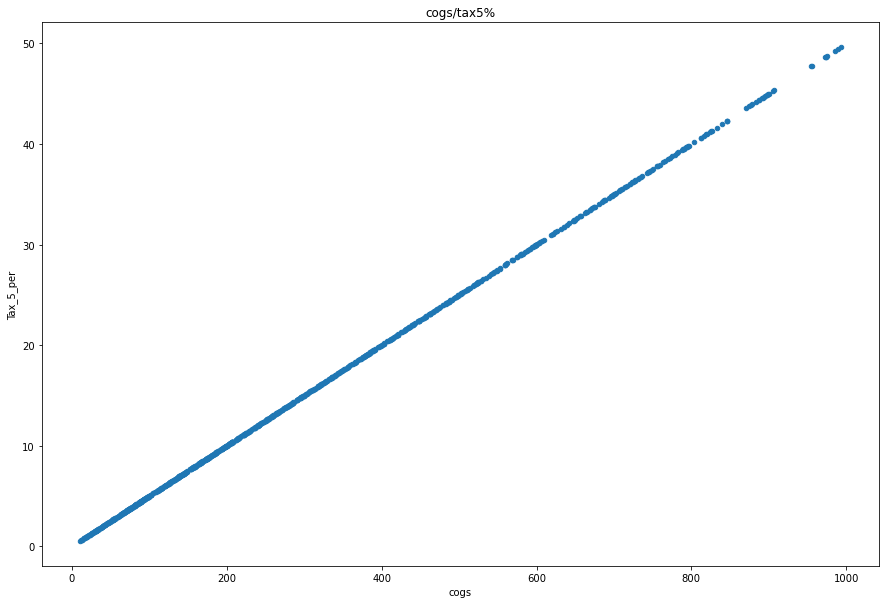

In [252]:
df.plot.scatter(x='cogs', y='Tax_5_per',  figsize=(15,10), sharex=False,
                     title='cogs/tax5%')

Both the visualization shows linear relation.

# Analysis of categorical columns

In [243]:
# Value counts of categorical columns:
for col in categorical_columns_list:
    print(df[col].value_counts())
    print()

A    340
B    332
C    328
Name: Branch, dtype: int64

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Member    501
Normal    499
Name: Customer_type, dtype: int64

Male             497
Female           494
Not Specified      9
Name: Gender, dtype: int64

Fashion accessories       178
Food and beverages        172
Electronic accessories    169
Sports and travel         165
Home and lifestyle        159
Health and beauty         152
Unknown Product Line        5
Name: Product_line, dtype: int64

2/7/2019     20
3/2/2019     18
2/15/2019    18
1/8/2019     18
3/14/2019    17
             ..
/26/2019      1
1/6/          1
1/10/         1
1/28/         1
2//2019       1
Name: Date, Length: 98, dtype: int64

19:48    13
13:40    13
10:12    10
10:23     9
15:48     7
         ..
17:44     1
19:50     1
15:32     1
13:19     1
18:18     1
Name: Time, Length: 501, dtype: int64

Ewallet                         338
Cash                            338
Credit card  

So here we can analyzie the categorical data 
>Branch and city have three possile values 

>customer type have two possible values, producd line have 6 possible value and payment ahve three possile value. All these attributes have one extra value possible, this shows that no values was given so we make separeate category.

>windspeed = windspeed does  not have alot of redundant values 

The other two categories also show different kind of trends. Time and date show partial uniqueness of values

# Inferential Analysis

### t-test

In [244]:
def t_test(df):
    num_columns,c = get_cols_type(df)
    for i in range(len(num_columns)-1):
        print("\n --------------------"+num_columns[i]+"------------------------")
        for j in range(i+1,len(num_columns)):
            col1 = num_columns[i]
            col2 = num_columns[j]
            t_val, p_val = stats.ttest_ind(df[col1], df[col2])
            print("(%s,%s) => t-value=%s, p-value=%s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))
            # interpret p-value
            alpha = 0.05
            #print('significance=%.3f, p=%.3f' % (alpha, p_val))
            if p_val <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')


In [245]:
t_test(df)


 --------------------Unit_price------------------------
(Unit_price,Quantity) => t-value=59.62942975353304, p-value=0.0
Dependent (reject H0)
(Unit_price,Tax_5_per) => t-value=44.025326332305184, p-value=1.63973852592908e-296
Dependent (reject H0)
(Unit_price,Total) => t-value=-1.0230680834622439, p-value=0.3063995074299802
Independent (fail to reject H0)
(Unit_price,cogs) => t-value=-33.8051396980754, p-value=1.675417248380624e-198
Dependent (reject H0)
(Unit_price,gross_margin_percentage) => t-value=60.83881979231415, p-value=0.0
Dependent (reject H0)
(Unit_price,gross_income) => t-value=44.025326332305184, p-value=1.63973852592908e-296
Dependent (reject H0)
(Unit_price,Rating) => t-value=58.07690196898584, p-value=0.0
Dependent (reject H0)

 --------------------Quantity------------------------
(Quantity,Tax_5_per) => t-value=-25.97346291981044, p-value=2.1595916496449208e-128
Dependent (reject H0)
(Quantity,Total) => t-value=-1.0272091939096832, p-value=0.3044463092120115
Independe

This simply shows that relation exist .
If a p-value reported from a t test is less than 0.05, then that result is said to be statistically significant. If a p-value is greater than 0.05, then the result is insignificant.

>> so many columns have a significant result here.
like ..  total and quantity ///  total and unit price

>>> For annova it simply means to show that relation exist between and string and numeric value

>>> Tukey confirms the relation exit betwween two particular groups.

### Chi Square

In [257]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(cat_cols, df):
    for i in range(len(cat_cols)-1):
        print("\n\t ------------------"+cat_cols[i]+"------------------")
        for j in range(i+1,len(cat_cols)):
            cat_var1 = cat_cols[i]
            cat_var2 = cat_cols[j]
            data_crosstab = pd.crosstab(df[cat_var1], df[cat_var2], margins = False) 
            print(data_crosstab) 

            stat, p, dof, expected = chi2_contingency(data_crosstab)
            print('dof=%d' % dof)
            print(expected)

            alpha = 0.05
            print('significance=%.3f, p=%.3f' % (alpha, p))
            if p <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')
            print("\n")

In [258]:
chi_square_test(categorical_columns_list, df)


	 ------------------Branch------------------
City    Mandalay  Naypyitaw  Yangon
Branch                             
A              0          0     340
B            332          0       0
C              0        328       0
dof=4
[[112.88  111.52  115.6  ]
 [110.224 108.896 112.88 ]
 [108.896 107.584 111.52 ]]
significance=0.050, p=0.000
Dependent (reject H0)


Customer_type  Member  Normal
Branch                       
A                 167     173
B                 165     167
C                 169     159
dof=2
[[170.34  169.66 ]
 [166.332 165.668]
 [164.328 163.672]]
significance=0.050, p=0.811
Independent (fail to reject H0)


Gender  Female  Male  Not Specified
Branch                             
A          160   178              2
B          158   169              5
C          176   150              2
dof=4
[[167.96  168.98    3.06 ]
 [164.008 165.004   2.988]
 [162.032 163.016   2.952]]
significance=0.050, p=0.244
Independent (fail to reject H0)


Product_line  Electronic acc

The goal of this test is to figure out whether a disparity between observed and predicted data is due to chance or a link between the variables you're looking at.

Between branch and city

### Anova

In [259]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):   
        num_col = num_cols[i]
        for j in range(len(cat_cols)-1):
            cat_col = cat_cols[j]
            mod = ols(num_col+" ~ "+cat_col,data=df).fit()
            aov_table=sm.stats.anova_lm(mod, typ=2)
            print ("\nANOVA => "+num_col+" - "+cat_col)
            print(aov_table)

In [260]:
anova_test(Numeric_columns_list, categorical_columns_list,df)


ANOVA => Unit_price - Branch
                 sum_sq     df         F    PR(>F)
Branch       631.715197    2.0  0.450786  0.637257
Residual  698579.498319  997.0       NaN       NaN

ANOVA => Unit_price - City
                 sum_sq     df         F    PR(>F)
City         631.715197    2.0  0.450786  0.637257
Residual  698579.498319  997.0       NaN       NaN

ANOVA => Unit_price - Customer_type
                      sum_sq     df         F    PR(>F)
Customer_type     328.204689    1.0  0.468674  0.493757
Residual       698883.008827  998.0       NaN       NaN

ANOVA => Unit_price - Gender
                 sum_sq     df         F    PR(>F)
Gender      2031.433225    2.0  1.452523  0.234474
Residual  697179.780291  997.0       NaN       NaN

ANOVA => Unit_price - Product_line
                     sum_sq     df         F    PR(>F)
Product_line    1372.082029    6.0  0.325404  0.923841
Residual      697839.131487  993.0       NaN       NaN

ANOVA => Unit_price - Date
                 su

LinAlgError: SVD did not converge

### Tukey

In [253]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


def tukeyhsd_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):
        num_var = num_cols[i]
        print("\t------------------------"+num_var+"--------------------")
        for j in range(len(cat_cols)-1):
            cat_var = cat_cols[j]
            tukey = pairwise_tukeyhsd(endog=df[num_var], groups=df[cat_var], alpha=0.05)
            #display results
            print(cat_var)
            print(tukey)
            print()

In [254]:
tukeyhsd_test(Numeric_columns_list, categorical_columns_list,df)

	------------------------Unit_price--------------------
Branch
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   0.9274  0.884 -3.8666 5.7214  False
     A      C    1.945 0.6006 -2.8638 6.7537  False
     B      C   1.0175 0.8613 -3.8196 5.8547  False
---------------------------------------------------

City
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
 Mandalay Naypyitaw   1.0175 0.8613 -3.8196 5.8547  False
 Mandalay    Yangon  -0.9274  0.884 -5.7214 3.8666  False
Naypyitaw    Yangon   -1.945 0.6006 -6.7537 2.8638  False
---------------------------------------------------------

Customer_type
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
------------------------------------------

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Product_line
               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
        group1                group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------
Electronic accessories  Fashion accessories  -0.6009  0.484 -1.5371 0.3353  False
Electronic accessories   Food and beverages   -0.186    0.9 -1.1301 0.7581  False
Electronic accessories    Health and beauty  -0.0969    0.9 -1.0714 0.8775  False
Electronic accessories   Home and lifestyle  -0.0841    0.9 -1.0472  0.879  False
Electronic accessories    Sports and travel  -0.2203    0.9 -1.1743 0.7337  False
Electronic accessories Unknown Product Line   0.5373    0.9 -3.4183 4.4928  False
   Fashion accessories   Food and beverages   0.4149 0.8258 -0.5171  1.347  False
   Fashion accessories    Health and beauty    0.504   0.69 -0.4587 1.4667  False
   Fashion accessories   Home and lifestyle   0.5168 0.6557 -0.4344  1.468  False
   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Gender
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1     group2    meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
Female          Male  -1.1873 0.2472  -2.9314 0.5567  False
Female Not Specified  -5.8704 0.2955 -15.1037  3.363  False
  Male Not Specified   -4.683 0.4609 -13.9159 4.5498  False
-----------------------------------------------------------

Product_line
               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj  lower    upper  reject
----------------------------------------------------------------------------------
Electronic accessories  Fashion accessories  -0.7605   0.9  -4.4839  2.9629  False
Electronic accessories   Food and beverages   0.0974   0.9  -3.6574  3.8523  False
Electronic accessories    Health and beauty    0.123   0.9  -3.7523  3.9984  False
Electronic accessories   Home and lifestyle   0.6866   0.9  -

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Product_line
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
        group1                group2          meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------------------------------------
Electronic accessories  Fashion accessories    -15.9704    0.9 -121683.9058 121651.9649  False
Electronic accessories   Food and beverages     72.1724    0.9 -122624.9474 122769.2921  False
Electronic accessories    Health and beauty      2.5833    0.9 -126631.9413 126637.1078  False
Electronic accessories   Home and lifestyle  76250.0803 0.5414  -48908.2502 201408.4109  False
Electronic accessories    Sports and travel       8.998    0.9 -123971.2964 123989.2924  False
Electronic accessories Unknown Product Line     45.6297    0.9 -514011.0704 514102.3297  False
   Fashion accessories   Food and beverages     88.1428    0.9 -121034.2806 121210.5663  False
   Fashion accessories    Health and 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Gender
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1     group2     meandiff p-adj    lower    upper  reject
--------------------------------------------------------------
Female          Male  -23.7465 0.2472  -58.6272 11.1342  False
Female Not Specified -117.4072 0.2955 -302.0742 67.2599  False
  Male Not Specified  -93.6607 0.4609 -278.3177 90.9964  False
--------------------------------------------------------------

Product_line
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                group2        meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------
Electronic accessories  Fashion accessories -15.2099   0.9  -89.6771  59.2572  False
Electronic accessories   Food and beverages   1.9483   0.9  -73.1488  77.0454  False
Electronic accessories    Health and beauty   2.4603   0.9  -75.0467  79.9672  False
Electronic accessories   Hom

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Product_line
               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
        group1                group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------
Electronic accessories  Fashion accessories     -0.0    0.9 -0.0379 0.0379  False
Electronic accessories   Food and beverages   0.0028    0.9 -0.0355  0.041  False
Electronic accessories    Health and beauty  -0.0247 0.5101 -0.0642 0.0147  False
Electronic accessories   Home and lifestyle      0.0    0.9  -0.039  0.039  False
Electronic accessories    Sports and travel      0.0    0.9 -0.0386 0.0386  False
Electronic accessories Unknown Product Line      0.0    0.9 -0.1602 0.1602  False
   Fashion accessories   Food and beverages   0.0028    0.9  -0.035 0.0405  False
   Fashion accessories    Health and beauty  -0.0247 0.4967 -0.0637 0.0142  False
   Fashion accessories   Home and lifestyle      0.0    0.9 -0.0385 0.0385  False
   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Gender
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1     group2    meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
Female          Male  -1.1873 0.2472  -2.9314 0.5567  False
Female Not Specified  -5.8704 0.2955 -15.1037  3.363  False
  Male Not Specified   -4.683 0.4609 -13.9159 4.5498  False
-----------------------------------------------------------

Product_line
               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj  lower    upper  reject
----------------------------------------------------------------------------------
Electronic accessories  Fashion accessories  -0.7605   0.9  -4.4839  2.9629  False
Electronic accessories   Food and beverages   0.0974   0.9  -3.6574  3.8523  False
Electronic accessories    Health and beauty    0.123   0.9  -3.7523  3.9984  False
Electronic accessories   Home and lifestyle   0.6866   0.9  -

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [261]:
from pandas_profiling import ProfileReport
import pandas.core.dtypes.generic 
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The profiling report is obtained on the cleaned data and the data is further visualized. Its also attached with the assignment.